In [1]:
# import basics libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
# Define Independent and Dependent Features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


### Feature Engineering

In [5]:
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [6]:
# drop those features from dataset
X = X.drop(columns = ['Geography','Gender'])

# concat get dummies features

X = pd.concat([X,geography,gender],axis = 1)

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 20)

### Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train.shape

(8000, 11)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [11]:
# Initialize ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units = 11,activation = 'relu'))

# Adding the first hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))

# Adding the Output layer
classifier.add(Dense(1,activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [12]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False,
)

In [13]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5645 - accuracy: 0.7231 - val_loss: 0.4473 - val_accuracy: 0.8042
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.7944 - val_loss: 0.4040 - val_accuracy: 0.8307
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8281 - val_loss: 0.3703 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3815 - accuracy: 0.8377 - val_loss: 0.3569 - val_accuracy: 0.8482
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3704 - accuracy: 0.8421 - val_loss: 0.3505 - val_accuracy: 0.8516
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8431 - val_loss: 0.3537 - val_accuracy: 0.8527
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3598 - accuracy: 0.8457 - val_loss: 0.3418 - val_accuracy:

In [14]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

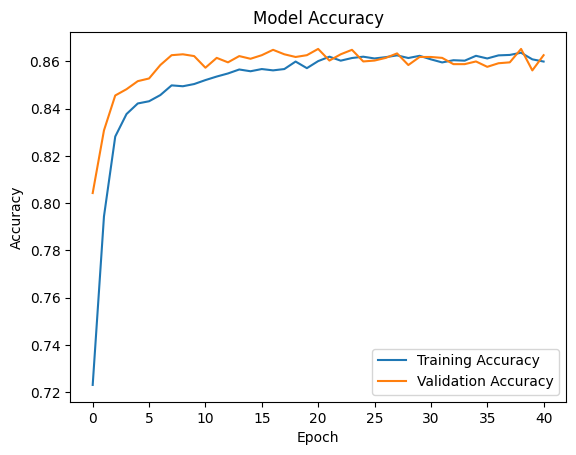

In [15]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


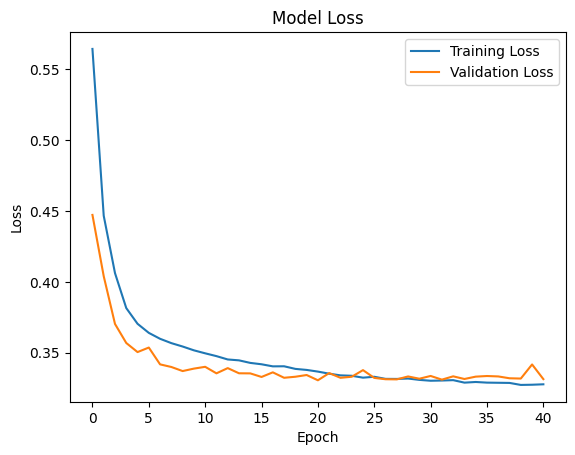

In [16]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Validation Loss (val_loss): This shows how well the model is performing on the validation set in terms of the loss function. If val_loss decreases, the model is learning well. If it starts increasing while training loss continues to decrease, it may indicate overfitting.

Validation Accuracy (val_accuracy): This shows how well the model is classifying the validation data. If validation accuracy is improving, it indicates that the model is generalizing well to new data. If validation accuracy stops improving or decreases while training accuracy continues to improve, this could also be a sign of overfitting

### Prediction and Evaluating 

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
# Predict on the training data
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred >= 0.5)

# confusion matrix
cm = confusion_matrix(y_train,y_train_pred)
print('confusion matrix')
print(cm)

# Calculate accuracy for the training data
train_score = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_score}")


250/250 [==============================] - 0s 1ms/step
confusion matrix
[[6048  292]
 [ 787  873]]
Training Accuracy: 0.865125


In [25]:
# Predict on test data
y_test_pred = classifier.predict(X_test)
y_test_pred = (y_test_pred >= 0.5)

# confusion matrix
cm = confusion_matrix(y_test,y_test_pred)
print('confusion matrix')
print(cm)

# Calculate accuracy for test data
test_score = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_score}")


63/63 [==============================] - 0s 2ms/step
confusion matrix
[[1543   80]
 [ 200  177]]
Test Accuracy: 0.86
